In [1]:
%matplotlib inline


# FFT滤波 - 绘制和操作


绘制一个信号的FFT的功率，并反过来FFT来重建信号。

学习 :func:`scipy.fftpack.fft`,
:func:`scipy.fftpack.fftfreq` and :func:`scipy.fftpack.ifft`. 




In [2]:
import numpy as np
from scipy import fftpack
from matplotlib import pyplot as plt

Generate the signal
###########################################################



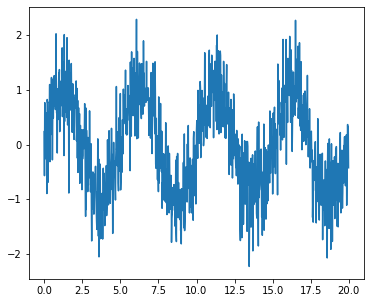

In [5]:
# Seed the random number generator
np.random.seed(1234)

time_step = 0.02
period = 5.

time_vec = np.arange(0, 20, time_step)
sig = (np.sin(2 * np.pi / period * time_vec)
       + 0.5 * np.random.randn(time_vec.size))

plt.figure(figsize=(6, 5))
plt.plot(time_vec, sig, label='Original signal')

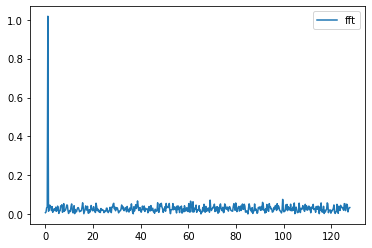

In [9]:
Fs = 256
N = len(time_vec)
freq = np.arange(N) / N * Fs

Y = np.fft.fft(sig)/(N/2)
Y[0] = Y[0] / 2
freq_half = freq[range(int(N/2))]
Y_half = Y[range(int(N/2))]

plt.plot(freq_half,abs(Y_half),label='fft')
plt.legend()

Compute and plot the power
###########################################################



[]

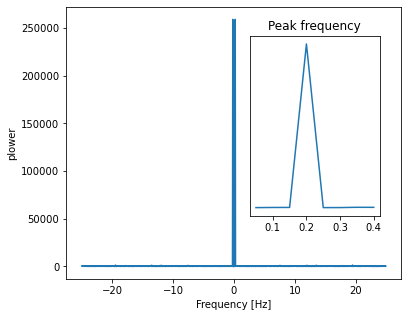

In [3]:
# The FFT of the signal
sig_fft = fftpack.fft(sig)

# And the power (sig_fft is of complex dtype)
power = np.abs(sig_fft)**2

# The corresponding frequencies
sample_freq = fftpack.fftfreq(sig.size, d=time_step)

# Plot the FFT power
plt.figure(figsize=(6, 5))
plt.plot(sample_freq, power)
plt.xlabel('Frequency [Hz]')
plt.ylabel('plower')

# Find the peak frequency: we can focus on only the positive frequencies
pos_mask = np.where(sample_freq > 0)
freqs = sample_freq[pos_mask]
peak_freq = freqs[power[pos_mask].argmax()]

# Check that it does indeed correspond to the frequency that we generate
# the signal with
np.allclose(peak_freq, 1./period)

# An inner plot to show the peak frequency
axes = plt.axes([0.55, 0.3, 0.3, 0.5])
plt.title('Peak frequency')
plt.plot(freqs[:8], power[pos_mask][:8])
plt.setp(axes, yticks=[])

# scipy.signal.find_peaks_cwt can also be used for more advanced
# peak detection

Remove all the high frequencies
###########################################################

 We now remove all the high frequencies and transform back from
 frequencies to signal.



/Users/wangfeng/miniconda3/envs/rascil/lib/python3.9/site-packages/matplotlib/cbook/__init__.py:1333: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)


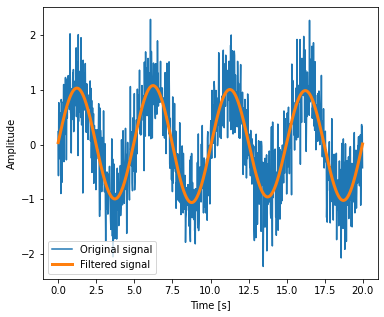

In [4]:
high_freq_fft = sig_fft.copy()
high_freq_fft[np.abs(sample_freq) > peak_freq] = 0
filtered_sig = fftpack.ifft(high_freq_fft)

plt.figure(figsize=(6, 5))
plt.plot(time_vec, sig, label='Original signal')
plt.plot(time_vec, filtered_sig, linewidth=3, label='Filtered signal')
plt.xlabel('Time [s]')
plt.ylabel('Amplitude')

plt.legend(loc='best')

**Note** This is actually a bad way of creating a filter: such brutal
cut-off in frequency space does not control distorsion on the signal.

Filters should be created using the scipy filter design code



In [ ]:
plt.show()